# Problème de voyageur de commerce
## Définition 
   Un voyageur de commerce doit visiter une et une seule fois un nombre fini de villes et revenir à son point d’origine.
   Trouvez l’ordre de visite des villes qui minimise la distance totale parcourue par le voyageur. (William Rowan Hamilton 1859)
## Modélisation du problème
   Le problème du voyageur de commerce peut être modélisé à l’aide d’un graphe constitué d’un ensemble de sommets et d’un ensemble d’arêtes. Chaque sommet représente une ville, une arête symbolise le passage d’une ville à une autre, et on lui associe un poids pouvant représenter une distance, un temps de parcours ou encore un coût.

  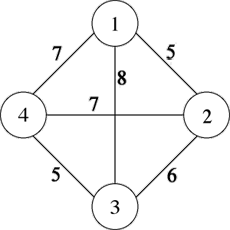
                               

                                            Exemple de graphe à 4 sommets

Résoudre le problème du voyageur de commerce revient à trouver dans ce graphe un cycle passant par tous les sommets une unique fois (un tel cycle est dit "hamiltonien") et qui soit de longueur minimale.
Comme il existe une arête entre chaque paire de sommets, on dit que ce graphe est « complet ». Pour tout graphe, une matrice de poids peut être établie. En lignes figurent les sommets d’origine des arêtes et en colonnes les sommets de destination ; le poids sur chaque arête apparaît à l’intersection de la ligne et de la colonne correspondantes. 

## Méthodes de résolution
   Il existe deux grandes catégories de méthodes de résolution : les méthodes exactes et les méthodes approchées.  
   Les méthodes exactes permettent d’obtenir une solution optimale à chaque fois, mais le temps de calcul peut être long si le problème est compliqué à résoudre.  
   Les méthodes approchées, encore appelées heuristiques, permettent quant à elles d’obtenir rapidement une solution approchée, mais qui n’est donc pas toujours optimale.
  
   ### Méthodes exactes
   #### Méthode énumérative
   La soution la plus évidente est de comparer tous les solutions possibles. 
   ##### Principe d'algorithme
1) Considérez la ville 1 comme point de départ et d'arrivée.  
2) Générez tout (n-1)! Permutations des villes.  
3) Calculez le coût de chaque permutation et gardez une trace de la permutation du coût minimum.  
4) Renvoyez la permutation avec un coût minimum.

In [28]:
# Ce block premet de générer les villes d'une manière aléatoire sous la forme des corrdonées(X,Y) et les  modélisées sous 
# la forme d'une matrice de distance entre chaque deux villes. 
# Cette partie n'est pas considérer dans l'analyse de la complexité de chaque solution.
import math
import random
import numpy as np

def generatecities(n):
    # Générer les villes aléatoirement
    random.seed(None)
    cities =[(0.1+random.uniform(0.0, 0.95) , 0.2 + random.uniform(0.0, 0.95)) for i in range(n)]
    return cities[:]

def distance(x, y):
    # Calculer la distance euclidienne entre deux points (villes) dans un plan 2D
    return math.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

n=int(input("Enter the number of cities:"))
l=generatecities(n)
# la creation de la matrice des distances
A = np.zeros((len(l),len(l)))

for i in l:
    for j in l:
        
        A[l.index(i)][l.index(j)]=distance(i,j)
print(A)
# Sauvgarder la matrice dans une matrice
np.savetxt('test1.txt', A, fmt='%f')

Enter the number of cities:6
[[0.         0.54577167 0.73573147 0.54582015 1.07067403 0.61076095]
 [0.54577167 0.         0.41465598 0.28251612 0.52832638 0.28990623]
 [0.73573147 0.41465598 0.         0.19454417 0.67198644 0.1405009 ]
 [0.54582015 0.28251612 0.19454417 0.         0.69357512 0.06709527]
 [1.07067403 0.52832638 0.67198644 0.69357512 0.         0.64836412]
 [0.61076095 0.28990623 0.1405009  0.06709527 0.64836412 0.        ]]


In [35]:
import math
import timeit
import time
import random
import numpy as np

#permutation
#premuted_cities=permutations(generatecities(n))
# Lire la materice des distances 
b = np.loadtxt('test1.txt', dtype=float)
print(b)



#print("======================================================================")
#print('\t Best=',best,"in the ",indexprermutation,'th premutation')
#print('======================================================================')
#print('temps:',time.process_time() - start)

[[0.       0.4526   0.784982 0.598352 0.54095 ]
 [0.4526   0.       0.863335 0.559023 0.099067]
 [0.784982 0.863335 0.       0.315748 0.861577]
 [0.598352 0.559023 0.315748 0.       0.548361]
 [0.54095  0.099067 0.861577 0.548361 0.      ]]


Le tableau ci-dessous montre l'augmantation rapide de nombre de possibilités et par consequence le temps d'execution.
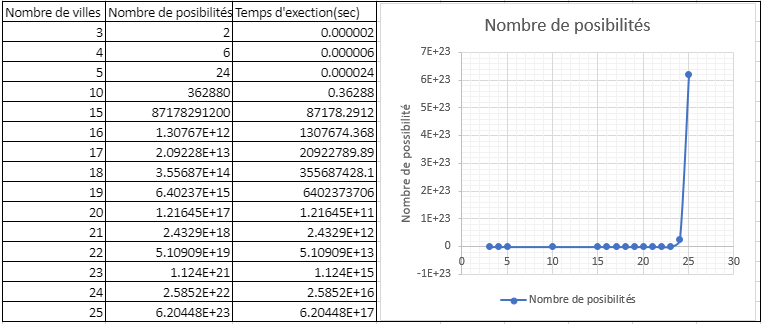

La complexité de cette solution est O(n!) où n est le nombre de villes. Par quelque optimisation en choisissant la ville de dépare on minimise sa complexité en (n-1)!. Or que le graphe est non-oriénté donc chaque cycle est parcouru deux fois dans les deux sens. Par exemple, si on nomme les points a, b, c, d, les chemins abcd et dcba, cdab et badc, adcb et bcda, cbad et dabc ont tous la même longueur, seul le point de départ et le sens de parcours change. On a donc 1/2(n-1)! chemins candidats à considérer.  
Malgré cette optimisation, la complexité reste en face à une explosion combnatoire avec un nombre de villes tèrs grand.
On suppose que le temps d'execution d'une itérarion est 1µs, le tableau suivant montre cette explosion.
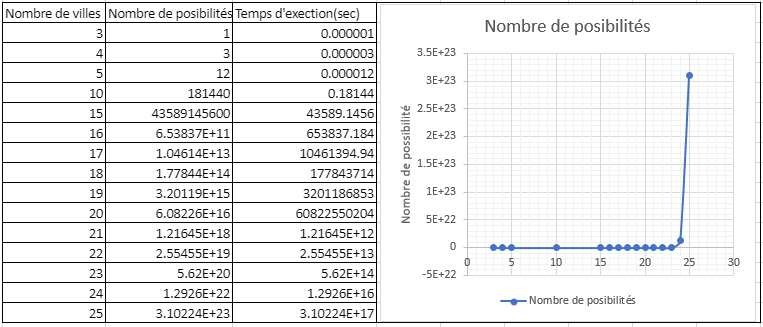

#### Programation Dynamique
 La programmation dynamique consiste à résoudre un problème en le décomposant en sous-problèmes, puis à résoudre les sous-problèmes, des plus petits aux plus grands en stockant les résultats intermédiaires.  
 Pour résoudre le problème de voyageur de commerce. Soit l'ensemble donné de sommets {1, 2, 3, 4,...,n}. Considérons 1 comme point de départ et d'arrivée. Pour chaque autre sommet i (autre que 1), nous trouvons le chemin de coût minimum avec 1 comme point de départ, i comme point de fin et tous les sommets apparaissant exactement une fois. Soit le coût de ce chemin  le coût (i), le coût du cycle correspondant serait le coût (i) + dist (i, 1) où dist (i, 1) est la distance de i à 1. Enfin, nous retournons le minimum de toutes les valeurs [cost (i) + dist (i, 1)]. Cela semble simple jusqu'à présent. Maintenant, la question est de savoir comment obtenir le coût (i)?  
 Pour calculer le coût (i) à l'aide de la programmation dynamique, nous devons avoir une relation récursive en termes de sous-problèmes. Définissons un terme C (S, i) comme le coût du chemin de coût minimum visitant chaque sommet de l'ensemble S exactement une fois, commençant à 1 et se terminant à i .
Nous commençons avec tous les sous-ensembles de taille 2 et calculons C (S, i) pour tous les sous-ensembles où S est le sous-ensemble, puis nous calculons C (S, i) pour tous les sous-ensembles S de taille 3 et ainsi de suite. Notez que 1 doit être présent dans chaque sous-ensemble.

In [29]:
import sys
import copy
import time
import numpy as np
            
matrix= np.loadtxt('test1.txt', dtype=float)
print(matrix)
number_of_cities=np.size(matrix,1)
data = list(range(1,number_of_cities))
print("data= ",data)


n = len(data)
all_sets = []
g = {}
p = []

def main():
    for x in range(1, n):
        g[x + 1, ()] = matrix[x][0]
        a=()
    l = list(a)
    for x in data:
          if(x==data[0]):
            pass
          else:
            l.append(x)

   # print (tuple(l))
    get_minimum(1,tuple(l))

    print('\n\nSolution to TSP: {1, ', end='')
    solution = p.pop()
    print(solution[1][0], end=', ')
    for x in range(n - 2):#O(n)
        for new_solution in p:#O(n)
            if tuple(solution[1]) == new_solution[0]:
                solution = new_solution
                print(solution[1][0], end=', ')
                break
    print('1}')
    return


def get_minimum(k, a):#O(2^n)
    if (k, a) in g:
        # Already calculated Set g[%d, (%s)]=%d' % (k, str(a), g[k, a]))
        return g[k, a]

    values = []
    all_min = []
    for j in a:
        set_a = copy.deepcopy(list(a))
        set_a.remove(j)
        all_min.append([j, tuple(set_a)])
        result = get_minimum(j, tuple(set_a))
        values.append(matrix[k-1][j-1] + result)

    # get minimun value from set as optimal solution for
    g[k, a] = min(values)
    p.append(((k, a), all_min[values.index(g[k, a])]))

    return g[k, a]


if __name__ == '__main__':#o(n²2^n) 
    main()

[[0.       0.545772 0.735731 0.54582  1.070674 0.610761]
 [0.545772 0.       0.414656 0.282516 0.528326 0.289906]
 [0.735731 0.414656 0.       0.194544 0.671986 0.140501]
 [0.54582  0.282516 0.194544 0.       0.693575 0.067095]
 [1.070674 0.528326 0.671986 0.693575 0.       0.648364]
 [0.610761 0.289906 0.140501 0.067095 0.648364 0.      ]]
data=  [1, 2, 3, 4, 5]


Solution to TSP: {1, 2, 5, 3, 4, 1}


##### Complexité 
la complexité de la solustion basé sur la programmation dynamique est:  
    *O(n) pour la division du problème en des sous-problèmes.  
    *O(n) pour la calculer le coût du point vers une déstination choisie.
    *O(2^n) pour le choix de la déstination.   
        Donc          T(n²)=O(n²2^n)

### Mèthodes approchées
 #### Algorithme glouton
   Une heuristique gloutonne construit une seule solution, par une suite de décisions définitives sans retour arrière.Elle est basée sur le choix d'un potimum local à chaque étape.
 
 Dans la méthode du plus proche voisin, on part d'un sommet quelconque et à chacune des (n-1) itérations on relie le dernier sommet atteint au sommet le plus proche au sens coût, puis on relie finalement le dernier sommet au premier sommet choisi.
 

In [35]:
import numpy as np 
import sys
b=np.loadtxt("C:/Users/ASUS/test1.txt",dtype=float)
print(b)
visited=[0]
def getmin(b,i):
    if(len(visited)>=np.size(b,1)):
        sys.exit(1)
    else:
        min_index=list(b[i]).index(min(b[i]))
        l=list(b[min_index])
        if(min_index not in visited):
            print("min index",min_index)
            visited.append(min_index)
            print("visited list",visited)
            getmin(b,min_index)
        else:
            b[min_index][list(b[min_index]).index(min(b[min_index]))]=math.inf
            getmin(b,min_index)
        
def main():
    getmin(b,0)
    visited.append(0)
    print("Las soulition est:",visited)
if 1==1:
    main()


[[0.       0.545772 0.735731 0.54582  1.070674 0.610761]
 [0.545772 0.       0.414656 0.282516 0.528326 0.289906]
 [0.735731 0.414656 0.       0.194544 0.671986 0.140501]
 [0.54582  0.282516 0.194544 0.       0.693575 0.067095]
 [1.070674 0.528326 0.671986 0.693575 0.       0.648364]
 [0.610761 0.289906 0.140501 0.067095 0.648364 0.      ]]
min index 1
visited list [0, 1]
min index 3
visited list [0, 1, 3]
min index 5
visited list [0, 1, 3, 5]
min index 2
visited list [0, 1, 3, 5, 2]
min index 4
visited list [0, 1, 3, 5, 2, 4]


SystemExit: 1

la complexité de la méthode approchée (algorithme glouton) est O(n²). En effet, à chaque sommet (O(n)) nous cherchons le plus proche voisin(o(n)).

### Conclusion
On peut déduire que la solution approchée est le meilleur en tèrme de temps d'execution. la programmation dynamique reduit le temps par rapprot la solution énumirative.  
Les courbes ci-dessous illustrent ces différences.


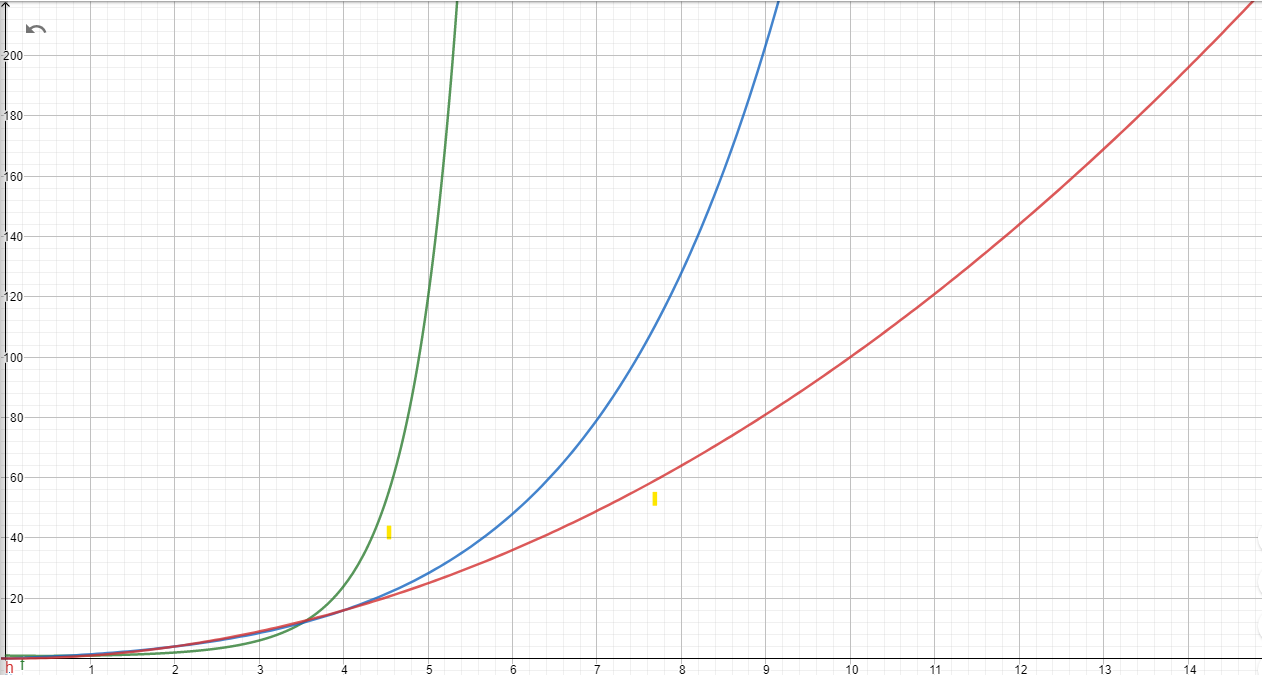  
Le courbe vert: La soulition énumirative.  
Le courbe bleu: La programmation dynamique.  
Le courbe rouge: La solution approchée (algorithme glouton).